<a href="https://colab.research.google.com/github/ranishrocks/cs367-ai-lab/blob/main/lab%204/%20TSP_Rajasthan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <u>**Loading Modules**</u>

In [ ]:
!pip install utm
import numpy as np
import pandas as pd
from math import radians, cos, sin, asin, sqrt, exp
import random
from matplotlib import pyplot as plt
import networkx as nx
import utm

  Preparing metadata (setup.py) ... done
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6085 sha256=45f220deeb0256aa70cb16a49fa312f9ddfe9c15369f45885e1a5679e7bc8e0d
  Stored in directory: /root/.cache/pip/wheels/2f/a1/c8/543df0e8f5e824c3e92a432e32deb9cd89ae686095ee8cfcbe
Successfully built utm


### <u>**Preparing data**</u>

In [ ]:
filepath = "/content/Rajasthan.xlsx"
df = pd.read_excel(filepath)
df.rename(columns={"Unnamed: 0" : "Locations", "Latitude": "Latitude (in degrees)",
 "Longitude": "Longitude (in degrees)"}, inplace=True)
df

,Locations,Latitude (in degrees),Longitude (in degrees)
0,Jaipur,26.9124,75.7873
1,Udaipur,24.5854,73.7125
2,Jodhpur,26.2389,73.0243
3,Jaisalmer,26.9157,70.9083
4,Ajmer,26.4499,74.6399
5,Mount_Abu,24.5926,72.7156
6,Bikaner,28.0176,73.3150
7,Bharatpur,27.2152,77.5030
8,Chittorgarh,24.8829,74.6230
9,Bundi,25.4326,75.6483


### <u>**Graph Representation**</u>

We used matrix representation. <br>
Entry(i,j) = distance b/w node i and node j.

### <u>**Coding Uitility Functions**</u>

**Haversine Formula**: To calculate distance between two locations using their latitude and longitude values. <br>
Reference: https://www.geeksforgeeks.org/program-distance-two-points-earth/

In [ ]:
# Haversine formula
def dist_formula(lt1,lg1,lt2,lg2):
    lg1 = radians(lg1)
    lg2 = radians(lg2)
    lt1 = radians(lt1)
    lt2 = radians(lt2)
    dlg = lg2 - lg1
    dlt = lt2 - lt1
    a = sin(dlt / 2)**2 + cos(lt1) * cos(lt2) * sin(dlg / 2)**2

    c = 2 * asin(sqrt(a))

    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371

    # calculate the result
    return(c * r)

In [ ]:
def tour_cost(path, distance_matrix):
    dis =0
    for i in range(19):
        ls = [path[i], path[i+1]]
        ls.sort()
        dis += distance_matrix[ls[0]][ls[1]]
    ls = [path[19], path[0]]
    ls.sort()
    dis += distance_matrix[ls[0]][ls[1]]
    return dis

### <u>**Creating Graph**</u>

In [ ]:
distance_matrix = np.zeros((20,20)) # distace_matrix[i][j] = distance b/w location i and location j
for i in range(20):
    for j in range(i+1,20):
        distance_matrix[i][j]=dist_formula(df.iloc[i,1],df.iloc[i,2],df.iloc[j,1],df.iloc[j,2])
        distance_matrix[j][i]=distance_matrix[i][j]

In [ ]:
G = nx.Graph()
pos = {}
for i in range(20):
    G.add_node(df.iloc[i][0])
    x, y, zone, ut = utm.from_latlon(df.iloc[i][1], df.iloc[i][2]) # to convert long, lat to x-y coordinates
               pos[df.iloc[i][0]] = (x,y)

<ipython-input-8-812475b383ac>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  G.add_node(df.iloc[i][0])
<ipython-input-8-812475b383ac>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x, y, zone, ut = utm.from_latlon(df.iloc[i][1], df.iloc[i][2]) # to convert long, lat to x-y coordinates
<ipython-input-8-812475b383ac>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pos[df.iloc[i][0]] = (x,y)


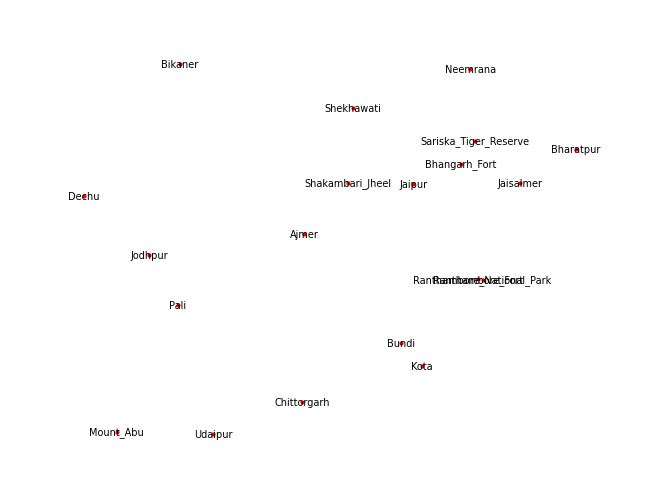

In [ ]:
nx.draw(G,pos=pos,with_labels=True, node_color="red", node_size=4, font_size=7)
plt.margins(0.15)
plt.show()

Let's shift Ranthambore_National_Park co-ordinates for visual clarity.

In [ ]:
RNPx,RNPy = pos["Ranthambore_National_Park"]
RNPx,RNPy

(650365.3495993316, 2878464.704691522)

<ipython-input-11-1607a42cf6fd>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  G.add_node(df.iloc[i][0])
<ipython-input-11-1607a42cf6fd>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x, y, zone, ut = utm.from_latlon(df.iloc[i][1], df.iloc[i][2]) # to convert long, lat to x-y coordinates
<ipython-input-11-1607a42cf6fd>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pos[df.iloc[i][0]] = (x,y)


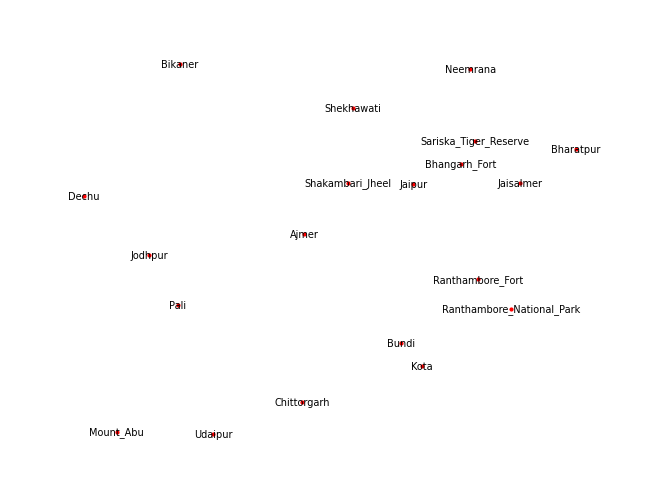

In [ ]:
G = nx.Graph()
pos = {}
for i in range(20):
    G.add_node(df.iloc[i][0])
    x, y, zone, ut = utm.from_latlon(df.iloc[i][1], df.iloc[i][2]) # to convert long, lat to x-y coordinates
            # reference: https://gis.stackexchange.com/questions/212723/how-can-i-convert-lon-lat-coordinates-to-x-y
    pos[df.iloc[i][0]] = (x,y)

pos["Ranthambore_National_Park"] = (RNPx+29990,RNPy-29990)

nx.draw(G,pos=pos,with_labels=True, node_color="red", node_size=4, font_size=7)
plt.margins(0.15)
plt.show()

##### *I hid this cell intentionally*

In [ ]:
intermediate_costs =[] # y-axis
x=0 # counter for number of actual iterations happened
intermediate_tempr = []

### **<u>Simulated Annealing</u>**

In [ ]:
def SA(initial_path, Tm=1000, iter_max=10000, cooling_factor=0.999):
    path = initial_path.copy()
    cost = tour_cost(path=path,distance_matrix=distance_matrix)

    global intermediate_costs
    intermediate_costs.append(cost)
    global intermediate_tempr
    intermediate_tempr.append(Tm)

    for i in range(1,iter_max):
        two_indices = random.sample(range(20),2)
        # two_indices.sort()
        next_path = path.copy()
        next_path[two_indices[0]:two_indices[1]+1] = next_path[two_indices[0]:two_indices[1]+1][::-1] # reverse sublist
        next_cost = tour_cost(next_path,distance_matrix=distance_matrix)

        dE = cost - next_cost # delta Energy

        T = Tm*(cooling_factor**i)
        # T = Tm*(cooling_factor/i)

        if(T == 1e-6):
            break

        try:
            pb = 1/(1+exp(-dE/T))
        except:
            continue
        if dE > 0:
            path = next_path.copy()
        else:
            #random.random() returns a uniformly distributed pseudo-random floating point number in the range [0, 1).
            # This number is less than a given number pb in the range [0,1) with probability pb
            if  random.random() < pb:
                path = next_path.copy()
        cost = tour_cost(path,distance_matrix=distance_matrix)

        intermediate_costs.append(next_cost)
        intermediate_tempr.append(T)
        global x
        x += 1

    final_cost = cost
    final_path = path.copy()
    return final_path

### <u>**Setting Initial Path Randomly**</u>

Total number of nodes/locations: 20

In [ ]:
init_path = np.random.permutation(20) # initial solution
print(init_path)

[17  5  2  3  9 12 18  8 16 10 15 14 19  1  6 13  4 11  0  7]


In [ ]:
cost = tour_cost(init_path,distance_matrix=distance_matrix)
initial_cost = cost
print("Initial Cost: ",initial_cost)

Initial Cost:  5354.589079681714


In [ ]:
final_path = SA(init_path)
final_cost = tour_cost(final_path,distance_matrix=distance_matrix)
print("Final Cost: ",final_cost)

Final Cost:  2148.8167123071667


In [ ]:
initial_graph = G.copy()
for i in range(19):
    initial_graph.add_edge(df.iloc[init_path[i]][0],df.iloc[init_path[i+1]][0])
initial_graph.add_edge(df.iloc[init_path[19]][0],df.iloc[init_path[0]][0])

final_graph = G.copy()
for i in range(19):
    final_graph.add_edge(df.iloc[final_path[i]][0],df.iloc[final_path[i+1]][0])
final_graph.add_edge(df.iloc[final_path[19]][0],df.iloc[final_path[0]][0])

<ipython-input-18-8e32006c1214>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initial_graph.add_edge(df.iloc[init_path[i]][0],df.iloc[init_path[i+1]][0])
<ipython-input-18-8e32006c1214>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initial_graph.add_edge(df.iloc[init_path[19]][0],df.iloc[init_path[0]][0])
<ipython-input-18-8e32006c1214>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  final_graph.add_edge(df.iloc[final_path[i]

Initial Cost:  5354.589079681714  km


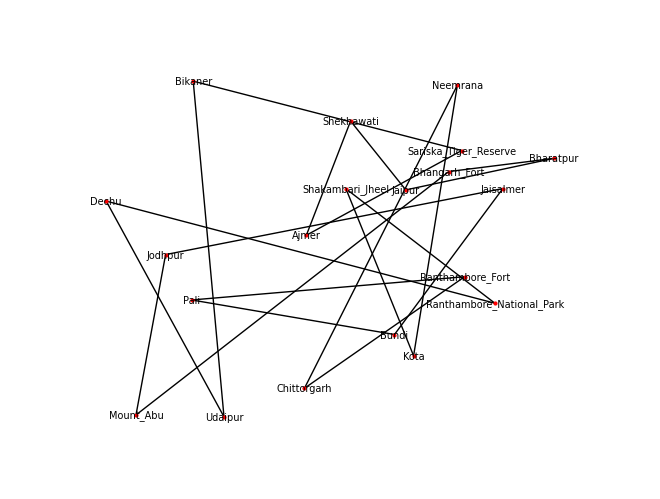

In [ ]:
print("Initial Cost: ", initial_cost, " km")
nx.draw(initial_graph,pos=pos,with_labels=True, node_color="red", node_size=4, font_size=7)
plt.margins(0.15)
plt.show()

Final Cost:  2148.8167123071667  km


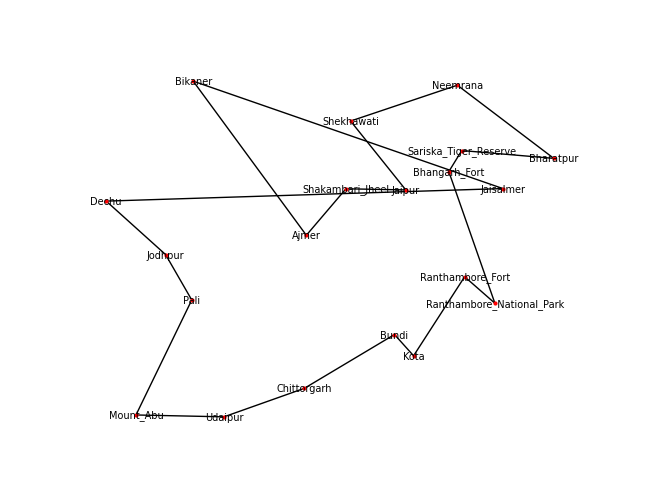

In [ ]:
print("Final Cost: ", final_cost, " km")
nx.draw(final_graph,pos=pos,with_labels=True, node_color="red", node_size=4, font_size=7)
plt.margins(0.15)
plt.show()

### **<u>Graphical Analysis</u>**

##### *hidden intentionally*

In [ ]:
import warnings
warnings.filterwarnings('ignore')
cooling_factors = [0.111, 0.222, 0.333, 0.444, 0.555, 0.666, 0.777, 0.888, 0.999]
cooling_factors_str = ["0.111", "0.222", "0.333", "0.444", "0.555", "0.666", "0.777", "0.888", "0.999"]
final_costs = []
for i in range(len(cooling_factors)):
    final_path_ = SA(initial_path=init_path,cooling_factor=cooling_factors[i])
    final_cost_ = tour_cost(final_path_,distance_matrix=distance_matrix)
    final_costs.append(final_cost_)

##### Final cost vs Cooling Factor

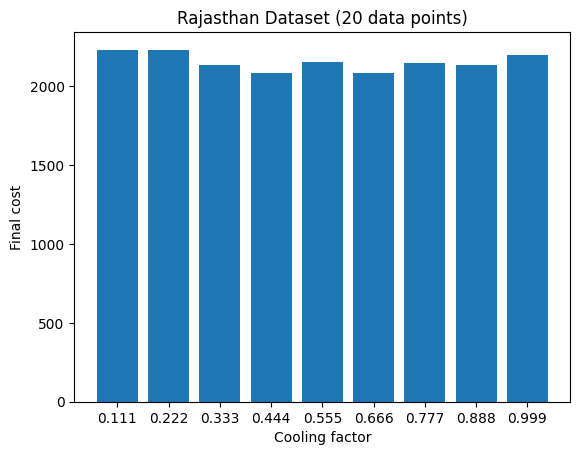

In [ ]:
plt.bar(cooling_factors_str,final_costs)
plt.title("Rajasthan Dataset (20 data points)")
plt.xlabel("Cooling factor")
plt.ylabel("Final cost")
plt.show()

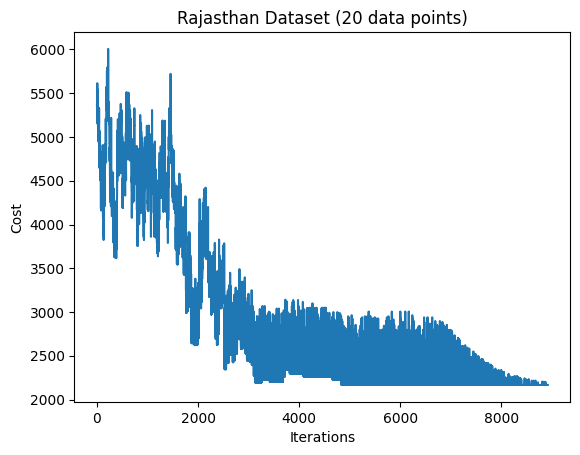

In [ ]:
global intermediate_costs
intermediate_costs = []
global x
x = 0
SA(initial_path=init_path)
plt.plot(range(x+1),intermediate_costs)
plt.title("Rajasthan Dataset (20 data points)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
 initial_tempr = range(1,1000, 20)
 final_cost_g3 = []
 for i in range(len(initial_tempr)):
     final_path_g3 = SA(initial_path=init_path,Tm=initial_tempr[i])
     final_cost_g3.append(tour_cost(final_path_g3,distance_matrix=distance_matrix))

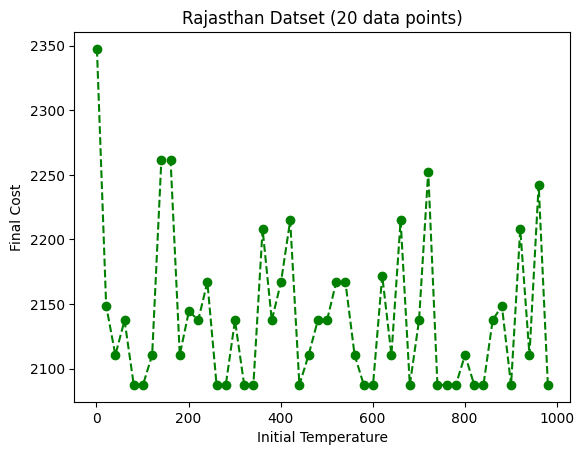

In [ ]:
 plt.plot(initial_tempr,final_cost_g3, "go--")
 plt.title("Rajasthan Datset (20 data points)")
 plt.xlabel("Initial Temperature")
 plt.ylabel("Final Cost")
 plt.show()

### Intermediate temperature Vs Cost

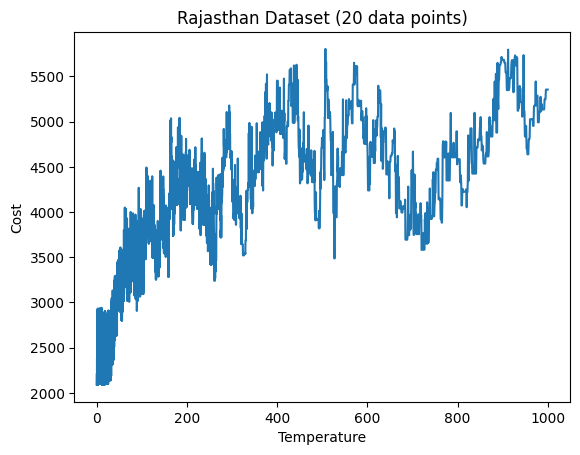

In [ ]:
global intermediate_tempr
intermediate_tempr = []
global intermediate_costs
intermediate_costs = []

SA(initial_path=init_path,)
plt.plot(intermediate_tempr, intermediate_costs)
plt.title("Rajasthan Dataset (20 data points)")
plt.xlabel("Temperature")
plt.ylabel("Cost")
plt.show()